# **`Business Understaing`**

This project aims to clean and analyze United Kingdom's Railway data to derive key insights

The insights the projects aims to derive include

- Trends in Ticket Purchase

- Determine the most preffered Payment Method

- Compare the performance of different Ticket Classes and Ticket Types

- Find the routes with most passengers (Route = Departure station - Arrival Station)

- Compare Railcard and find their frequency of use

- Analogize different purchase types

- Find the major reasons for delays



# **`Data Understanding`**


In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
uk_railway_data = pd.read_csv(r"..\UK Railway Data\railway.csv")

uk_railway_data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [3]:
# Check dataset info
uk_railway_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

## Notes

- The dataset has 31653 rows, and 18 columns of data

- Railcard and Actual Arrive Time columns have missing data

- Reason for delay also has missing values (Could be that this column was updated only when there was a delay)

- Date of Purchase, Time of Purchase, Date of Journey, Departure Time, Arrival Time and Actual Arrival Time	Journey have incorrect datatypes (Object datatype instead of DateTime)


In [4]:
# Check for missing values
missing_values = uk_railway_data.isnull().sum()

missing_values

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [5]:
# Display basic information about the dataset (categorical columns)
uk_railway_data.describe(include='O')

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
count,31653,31653,31653,31653,31653,10735,31653,31653,31653,31653,31653,31653,31653,29773,31653,4172,31653
unique,31653,128,24351,2,3,3,2,3,12,32,121,96,203,623,3,8,2
top,da8a6ba8-b3dc-4677-b176,2024-02-02,08:16:53,Online,Credit Card,Adult,Standard,Advance,Manchester Piccadilly,Birmingham New Street,2024-03-09,18:45:00,19:05:00,19:05:00,On Time,Weather,No
freq,1,513,6,18521,19136,4846,28595,17561,5650,7742,313,2598,1069,1013,27481,995,30535


In [6]:
# Display basic information about the dataset (numerical columns)
uk_railway_data.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [7]:
# Check for duplicate rows
duplicate_rows = uk_railway_data.duplicated().sum()

print(f"We have {duplicate_rows} duplicate rows in our dataset.")

We have 0 duplicate rows in our dataset.


In [8]:
# Check for data types of each column
uk_railway_data.dtypes  

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object

## **Data Cleaning**

In [9]:
# Change Date of Purchase and Date of Journey from Objects to Datetime
uk_railway_data['Date of Purchase'] = pd.to_datetime(uk_railway_data['Date of Purchase'], errors='coerce')
uk_railway_data['Date of Journey'] = pd.to_datetime(uk_railway_data['Date of Journey'], errors='coerce')
uk_railway_data['Date of Purchase'].info()   
uk_railway_data['Date of Journey'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 31653 entries, 0 to 31652
Series name: Date of Purchase
Non-Null Count  Dtype         
--------------  -----         
31653 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 247.4 KB
<class 'pandas.core.series.Series'>
RangeIndex: 31653 entries, 0 to 31652
Series name: Date of Journey
Non-Null Count  Dtype         
--------------  -----         
31653 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 247.4 KB


In [10]:
# Convert time columns to datetime64[ns]
cols = [
    'Time of Purchase',
    'Departure Time',
    'Arrival Time',
    'Actual Arrival Time'
]

for col in cols:
    uk_railway_data[col] = pd.to_datetime(
        uk_railway_data[col],
        format='%H:%M:%S',
        errors='coerce'
    )

# Check dtypes
uk_railway_data[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time of Purchase     31653 non-null  datetime64[ns]
 1   Departure Time       31653 non-null  datetime64[ns]
 2   Arrival Time         31653 non-null  datetime64[ns]
 3   Actual Arrival Time  29773 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 989.3 KB


In [11]:
# Get unique values from all categorical_columns
categorical_columns = uk_railway_data.drop('Transaction ID', axis=1).select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = uk_railway_data[col].unique()
    print(f"Unique values in '{col}' Column: \n{unique_values}\n")


Unique values in 'Purchase Type' Column: 
['Online' 'Station']

Unique values in 'Payment Method' Column: 
['Contactless' 'Credit Card' 'Debit Card']

Unique values in 'Railcard' Column: 
['Adult' nan 'Disabled' 'Senior']

Unique values in 'Ticket Class' Column: 
['Standard' 'First Class']

Unique values in 'Ticket Type' Column: 
['Advance' 'Off-Peak' 'Anytime']

Unique values in 'Departure Station' Column: 
['London Paddington' 'London Kings Cross' 'Liverpool Lime Street'
 'London Euston' 'York' 'Manchester Piccadilly' 'Birmingham New Street'
 'London St Pancras' 'Oxford' 'Reading' 'Edinburgh Waverley'
 'Bristol Temple Meads']

Unique values in 'Arrival Destination' Column: 
['Liverpool Lime Street' 'York' 'Manchester Piccadilly' 'Reading'
 'London Euston' 'Oxford' 'Durham' 'London St Pancras'
 'Birmingham New Street' 'London Paddington' 'Bristol Temple Meads'
 'Tamworth' 'London Waterloo' 'Sheffield' 'Wolverhampton' 'Leeds'
 'Stafford' 'Doncaster' 'Swindon' 'Nottingham' 'Peterborough

## Notes

- Column "Reasons for Delay" has some repetations due to differences in spelling and the use of cases

- We will standardize the wording

In [12]:
# Clean reasons for delay column
uk_railway_data['Reason for Delay'].unique()

array([nan, 'Signal Failure', 'Technical Issue', 'Weather Conditions',
       'Weather', 'Staffing', 'Staff Shortage', 'Signal failure',
       'Traffic'], dtype=object)

In [13]:
# Standardizing the values in the 'Reason for Delay' column for consistency
uk_railway_data['Reason for Delay'] = uk_railway_data['Reason for Delay'].replace({'Signal failure': 'Signal Failure',
                                                                                   'Staff shortage': 'Staff Shortage',
                                                                                    'Weather': 'Weather Conditions',
                                                                                    'Staffing': 'Staff Shortage'})

uk_railway_data['Reason for Delay'].unique()

array([nan, 'Signal Failure', 'Technical Issue', 'Weather Conditions',
       'Staff Shortage', 'Traffic'], dtype=object)

## **Data Exploration and Analysis**

## 1. Trend in Ticket Purchase

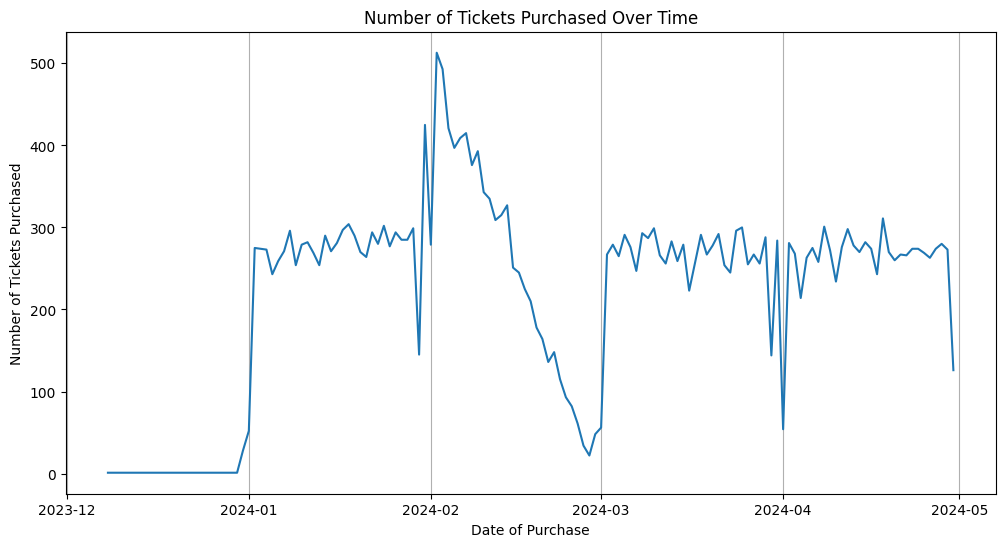

In [14]:
# Get transaction ID and purchase date columns
ticket_purchase = uk_railway_data[["Date of Purchase", "Transaction ID"]]

# Sum number of tickets purchased on each date
tickets_per_date = ticket_purchase.groupby("Date of Purchase")["Transaction ID"].count()

# Plot a line chart to visualize ticket purchases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=tickets_per_date)
plt.title("Number of Tickets Purchased Over Time")
plt.xlabel("Date of Purchase")
plt.ylabel("Number of Tickets Purchased")
plt.grid(axis='x')
plt.show()

## Notes

* Ticket purchases remain very low toward the end of 2023, reaching nearly zero.
* In January 2024, ticket purchases increase sharply and stabilize at around **300 tickets per day**.
* Purchases rise again toward the end of January and the beginning of February, followed by a sharp decline toward the end of February. This is followed by another sharp increase at the beginning of March.
* Ticket purchases stabilize again before experiencing a sharp decline toward the end of March. A similar pattern is observed in April.

**From this analysis, we can infer that ticket purchases tend to decline toward the end of each month and then increase and stabilize at the beginning of the following month.**


## 2. The Most preferred payment Method

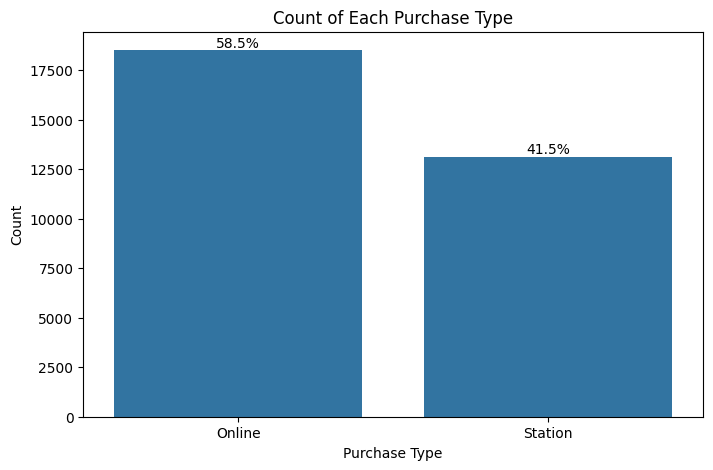

In [15]:
# Count of each purchase type
uk_railway_data["Purchase Type"].value_counts()

# Plot a bar chart to visualize purchase types
plt.figure(figsize=(8, 5))
sns.countplot(data=uk_railway_data, x="Purchase Type", order=uk_railway_data["Purchase Type"].value_counts().index)
plt.title("Count of Each Purchase Type")
plt.xlabel("Purchase Type")
plt.ylabel("Count")

# Add data labels in percentages
total = len(uk_railway_data)    
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

## Notes
- Most clients prefer online method of ticket purchase

- From December 2023 to April 2024, 58.5% of clients bought their tickets online, compared to 41.5% who bought theirs at the station

## 3. Compare the performance of different Ticket Classes and Ticket Types

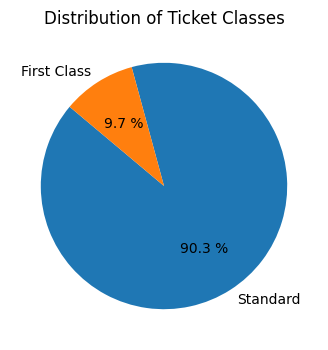

In [16]:
# Get ticket classes
ticket_classes = uk_railway_data["Ticket Class"].value_counts()

# Plot a pie chart to visualize ticket classes
plt.figure(figsize=(4, 4))
plt.pie(ticket_classes, labels=ticket_classes.index, autopct='%1.1f %%', startangle=140)
plt.title("Distribution of Ticket Classes")
plt.show()

## Notes

- 90.3 of passengers buy the Standard Class tickets 

- 9.7 buy the first class

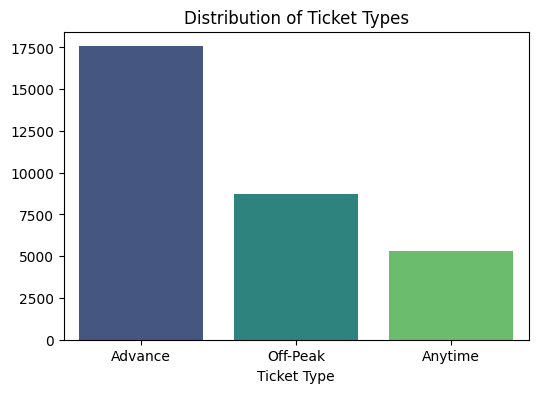

In [17]:
# Get ticket types data
ticket_types = uk_railway_data["Ticket Type"].value_counts()

# Plot a bar chart to visualize ticket types
plt.figure(figsize=(6, 4))
sns.barplot(x=ticket_types.index, y=ticket_types.values, palette="viridis")
plt.title("Distribution of Ticket Types")   
plt.xlabel("Ticket Type")
plt.show()

## Notes

- The most bought tickets are the advance tickets followed by off-peak tickets types and the least bought are the anytime ticket types

## 4. Find the routes with most passengers (Route = Departure station -> Arrival Station)


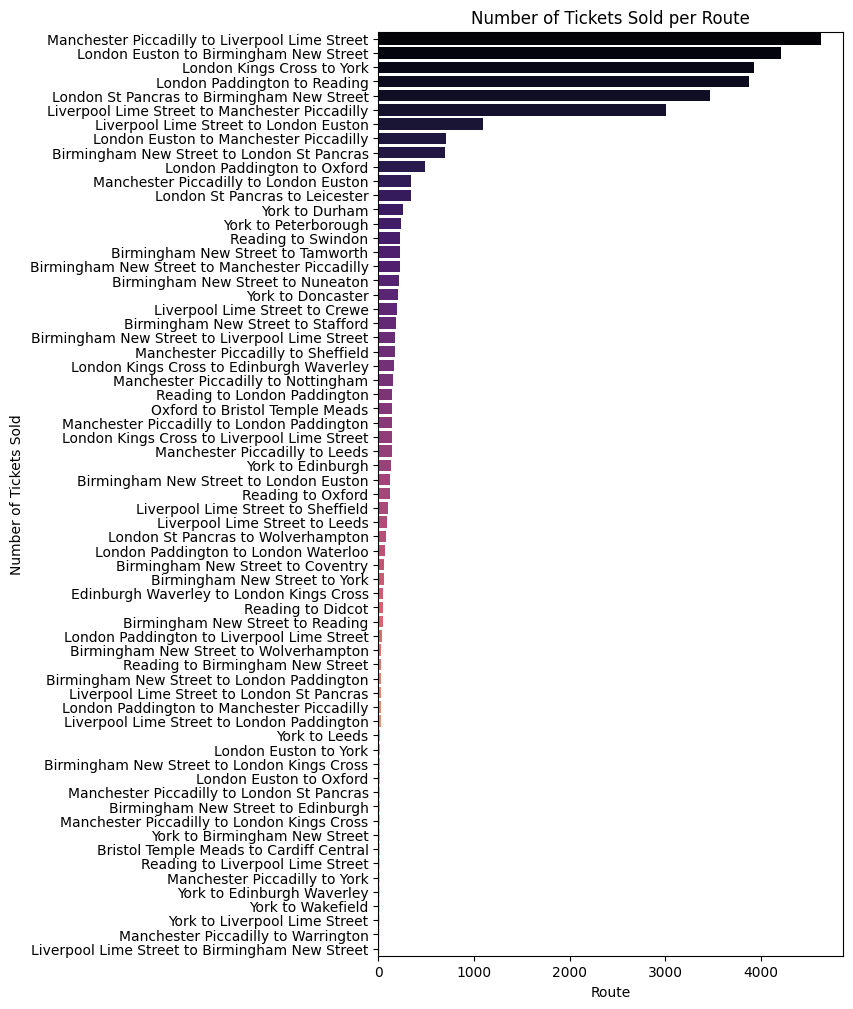

In [26]:
# Get route data
# Route = Departure Station to Arrival Station
uk_railway_data["Route"] = uk_railway_data["Departure Station"] + " to " + uk_railway_data["Arrival Destination"]

# Get number of tickets sold per route
tickets_per_route = uk_railway_data["Route"].value_counts()

# Plot a bar chart to visualize number of tickets sold per route
plt.figure(figsize=(6, 12))
sns.barplot(y=tickets_per_route.index, x=tickets_per_route.values, palette="magma")
plt.title("Number of Tickets Sold per Route")
plt.xlabel("Route")
plt.ylabel("Number of Tickets Sold")
plt.show()

## Notes

The top 5 routes with the highest number of tickets sold are:

1. Manchester Piccadilly to liverpool Lime Street
2. London Euston to Birmingham New Street
3. London King's Cross to York
4. London Paddington to Reading 
5. London St. Pancras to Bermingham New Street


__In that order.__
